<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


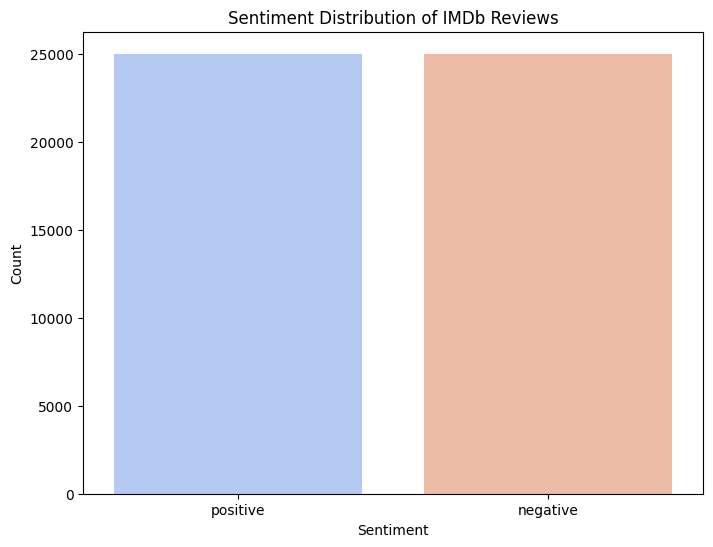

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


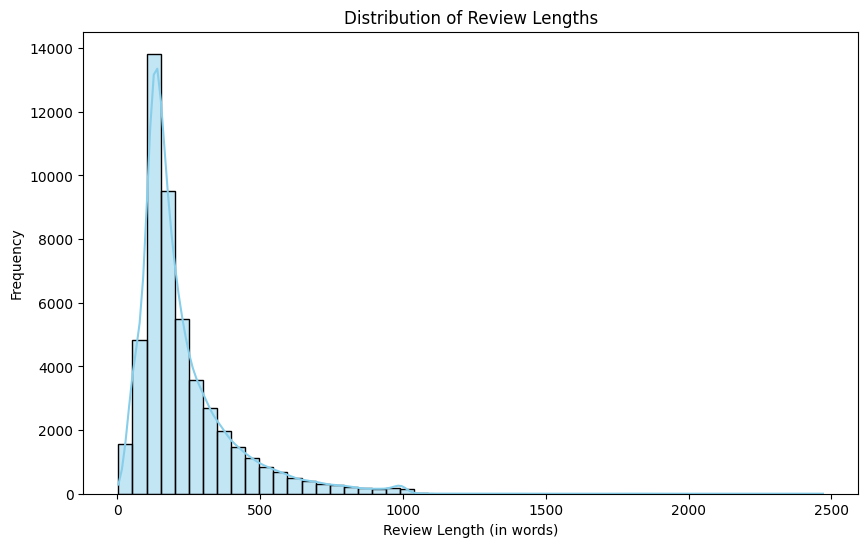

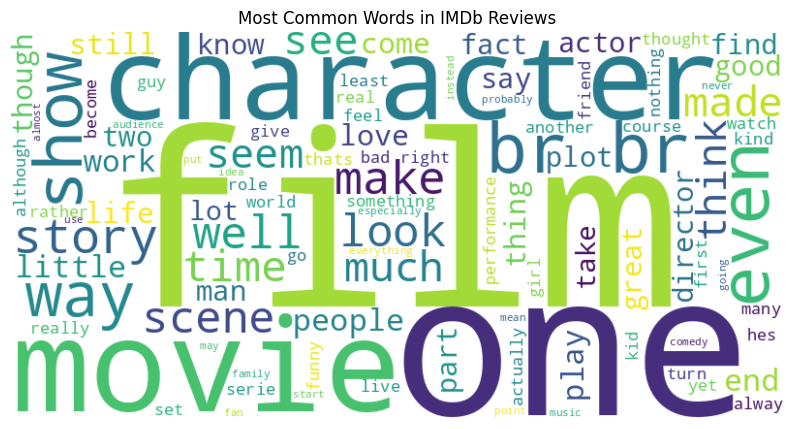

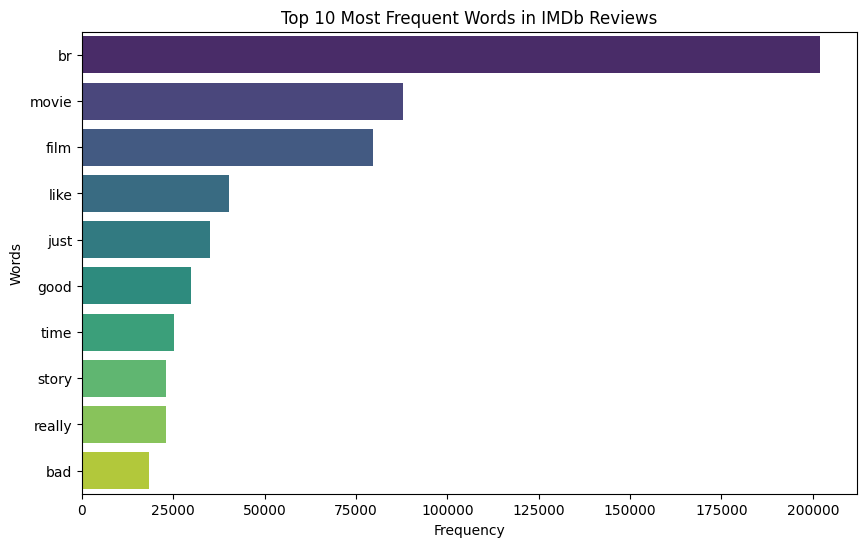

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import string

df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

print(df.info())
print(df.head())

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment', palette='coolwarm')
plt.title('Sentiment Distribution of IMDb Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

df['review_length'] = df['review'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (in words)')
plt.ylabel('Frequency')
plt.show()

stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text = text.lower() 
    text = ''.join([char for char in text if char not in string.punctuation]) 
    tokens = word_tokenize(text) 
    return [word for word in tokens if word not in stop_words and len(word) > 1]  

df['cleaned_review'] = df['review'].apply(preprocess_text)

all_words = [word for review in df['cleaned_review'] for word in review]

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in IMDb Reviews')
plt.show()

vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['review'])
words = vectorizer.get_feature_names_out()
word_freq = X.sum(axis=0).A1
word_freq_dict = dict(zip(words, word_freq))

sorted_word_freq = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)

top_n = 10 
top_words = sorted_word_freq[:top_n]
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=top_words_df, palette='viridis')
plt.title(f'Top {top_n} Most Frequent Words in IMDb Reviews')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()
